# COVID-19 Data and Panda Time Series

## Objectives
- Download and clean a real-world dataset
- Use the datetime datatype to resample a time series
- Plot different timeframes of a time series
- Use the datetime datatype to group data by days of the week

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

## Locate the Data
- This dataset is from the Center for Systems Science and Engineering at Johns Hopkins University.
- This page is a table of links to CSV files; take a look: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports>
- We begin by harvesting the CSV files names listed on this site and cleaning the data

In [9]:
# Get the contents of the HTML table from the GitHub Page
csv_files = pd.read_html('https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports')[0]
csv_files.head()

,Type,Name,Latest commit message,Commit time
0,NaN,Failed to load latest commit information.,Failed to load latest commit information.,Failed to load latest commit information.
1,NaN,.gitignore,update,"Feb 14, 2020"
2,NaN,01-22-2020.csv,update,"Feb 14, 2020"
3,NaN,01-23-2020.csv,removed extra space at end of lines,"Feb 20, 2020"
4,NaN,01-24-2020.csv,removed extra space at end of lines,"Feb 20, 2020"


In [10]:
# Remove rows that don't contain a filename
csv_files = csv_files[csv_files['Name'].str.contains('.csv')]
csv_files.head()

,Type,Name,Latest commit message,Commit time
2,NaN,01-22-2020.csv,update,"Feb 14, 2020"
3,NaN,01-23-2020.csv,removed extra space at end of lines,"Feb 20, 2020"
4,NaN,01-24-2020.csv,removed extra space at end of lines,"Feb 20, 2020"
5,NaN,01-25-2020.csv,removed extra space at end of lines,"Feb 20, 2020"
6,NaN,01-26-2020.csv,removed extra space at end of lines,"Feb 20, 2020"


In [11]:
# Select the name column
csv_files = list(csv_files['Name'])
csv_files

['01-22-2020.csv',
 '01-23-2020.csv',
 '01-24-2020.csv',
 '01-25-2020.csv',
 '01-26-2020.csv',
 '01-27-2020.csv',
 '01-28-2020.csv',
 '01-29-2020.csv',
 '01-30-2020.csv',
 '01-31-2020.csv',
 '02-01-2020.csv',
 '02-02-2020.csv',
 '02-03-2020.csv',
 '02-04-2020.csv',
 '02-05-2020.csv',
 '02-06-2020.csv',
 '02-07-2020.csv',
 '02-08-2020.csv',
 '02-09-2020.csv',
 '02-10-2020.csv',
 '02-11-2020.csv',
 '02-12-2020.csv',
 '02-13-2020.csv',
 '02-14-2020.csv',
 '02-15-2020.csv',
 '02-16-2020.csv',
 '02-17-2020.csv',
 '02-18-2020.csv',
 '02-19-2020.csv',
 '02-20-2020.csv',
 '02-21-2020.csv',
 '02-22-2020.csv',
 '02-23-2020.csv',
 '02-24-2020.csv',
 '02-25-2020.csv',
 '02-26-2020.csv',
 '02-27-2020.csv',
 '02-28-2020.csv',
 '02-29-2020.csv',
 '03-01-2020.csv',
 '03-02-2020.csv',
 '03-03-2020.csv',
 '03-04-2020.csv',
 '03-05-2020.csv',
 '03-06-2020.csv',
 '03-07-2020.csv',
 '03-08-2020.csv',
 '03-09-2020.csv',
 '03-10-2020.csv',
 '03-11-2020.csv',
 '03-12-2020.csv',
 '03-13-2020.csv',
 '03-14-2020

## Download the data
- We now loop through each CSV file on this page and download a separate CSV file for each day of collected data.
- With each iteration, we append the CSV filename to the end of a base URL to get a URL that pooints to that file.
- We use `read_csv()` and the file URL to download each CSV file and append the resulting dataframe to the `covid_days` list.
- `dtype` explicitly defines the datatype of a column for Pandas.
  - `Int64` is a "smart" integer type that handles NaN values well.

In [12]:
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

In [13]:
covid_days = []
for day in csv_files:
    # Status update
    print('Downloading ' + day)
    covid_days.append(pd.read_csv(base_url + day,
                                  dtype={'Confirmed':'Int64', 'Deaths': 'Int64',
                                          'Recovered': 'Int64', 'FIPS': 'Int64', 'Active': 'Int64'}))
print('Done downloading.')

Done downloading.


## Clean the data - create a new column indicating the day
- Each day has it's own file named according to the date.
- We want to combine all the data into one dataframe.
- To distinguish date, we will add a new column called `Day` to each dataframe in our list and populate every entry in that column with the date from the filename.
- `enumerate()` provides the item and its index (sometimes we need both in a loop)

In [15]:
for i, day in enumerate(csv_files):
    covid_days[i]['Day'] = day.strip('.csv')

In [18]:
# The first day in our dataset
covid_days[0]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day
0,Anhui,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020
1,Beijing,Mainland China,1/22/2020 17:00,14,<NA>,<NA>,01-22-2020
2,Chongqing,Mainland China,1/22/2020 17:00,6,<NA>,<NA>,01-22-2020
3,Fujian,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020
4,Gansu,Mainland China,1/22/2020 17:00,<NA>,<NA>,<NA>,01-22-2020
5,Guangdong,Mainland China,1/22/2020 17:00,26,<NA>,<NA>,01-22-2020
6,Guangxi,Mainland China,1/22/2020 17:00,2,<NA>,<NA>,01-22-2020
7,Guizhou,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020
8,Hainan,Mainland China,1/22/2020 17:00,4,<NA>,<NA>,01-22-2020
9,Hebei,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020


## Clean the data - combine all days into one dataframe
- `concat()` combines multiple dataframes

In [19]:
covid_data = pd.concat(covid_days, axis=0)
# Write the combined raw data to a CSV file for later use
covid_data.to_csv('data_raw/covid-days.csv')

In [20]:
# Let's take a peek
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Anhui,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,<NA>,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get to know our data

In [22]:
# How many entries do we have?
covid_data.shape

(269675, 20)

In [23]:
# What columns are in our dataset?
covid_data.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Day', 'Latitude', 'Longitude', 'FIPS', 'Admin2',
       'Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Active', 'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

## Clean the data - repeat columns
- They added columns as time went on.
- When we combined older data with newer data, there were columns that contain the same information.
- So long as these columns don't have overlapping entries, we can safely combine them.

In [26]:
# Are `Country_Region` and `Country/Region` safe to combine -- Yes
covid_data[covid_data['Country_Region'].notnull() & covid_data['Country/Region'].notnull()]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio


In [27]:
# Merge entries from `Country/Region` into `Country_Region`
covid_data['Country_Region'] = covid_data['Country_Region'].where(covid_data['Country_Region'].notnull(), covid_data['Country/Region'])

In [29]:
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Anhui,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,<NA>,<NA>,<NA>,01-22-2020,NaN,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We repeat this process for other similar columns

In [31]:
covid_data[covid_data['Last Update'].notnull() & covid_data['Last_Update'].notnull()]
covid_data['Last_Update'] = covid_data['Last_Update'].where(covid_data['Last_Update'].notnull(), covid_data['Last Update'])

## Clean the data - finishing touches
- We will remove the data we don't need for the purposes of this exercise
- Convert the `Day` column to Panda's `datetime` type
  - This is a very powerful datatype for time series

In [32]:
# Get rid of unnesessary columns by selecting what we want
covid_data = covid_data[['Country_Region', 'Day', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

In [33]:
# Convert `Day` to datetime
covid_data['Day'] = pd.to_datetime(covid_data['Day'])

In [34]:
# Let's have a look
covid_data

,Country_Region,Day,Confirmed,Deaths,Recovered,Active
0,Mainland China,2020-01-22,1,<NA>,<NA>,NaN
1,Mainland China,2020-01-22,14,<NA>,<NA>,NaN
2,Mainland China,2020-01-22,6,<NA>,<NA>,NaN
3,Mainland China,2020-01-22,1,<NA>,<NA>,NaN
4,Mainland China,2020-01-22,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...
3712,West Bank and Gaza,2020-06-10,485,3,410,72
3713,Western Sahara,2020-06-10,9,1,6,2
3714,Yemen,2020-06-10,560,129,23,408
3715,Zambia,2020-06-10,1200,10,912,278


## Datetime and time series
- Datetime date types have a lot of hand features
- We can find the length of time by subtracting two datetime objects

In [35]:
covid_data['Day'].max() - covid_data['Day'].min()

Timedelta('140 days 00:00:00')

- Let's narrow the data again and look at confirmed cases in three countries that have seen heavy media coverage

In [37]:
three_countries = covid_data[covid_data['Country_Region'].isin(['Mainland China', 'US', 'Italy'])]
three_countries

,Country_Region,Day,Confirmed,Deaths,Recovered,Active
0,Mainland China,2020-01-22,1,<NA>,<NA>,NaN
1,Mainland China,2020-01-22,14,<NA>,<NA>,NaN
2,Mainland China,2020-01-22,6,<NA>,<NA>,NaN
3,Mainland China,2020-01-22,1,<NA>,<NA>,NaN
4,Mainland China,2020-01-22,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...
3485,Italy,2020-06-10,10148,1078,8531,539
3498,Italy,2020-06-10,1436,76,1332,28
3509,Italy,2020-06-10,1191,144,1041,6
3518,Italy,2020-06-10,19194,1961,16268,965


- `pivot_table` (like in Excel) is like `pivot`, but it accepts an `aggfunc` parameter that defines how we combine values
  - Notice that each country has multiple entries for each date. We will sum the values for each date in the `confirmed` column

In [38]:
confirmed = three_countries.pivot_table(index='Day', columns='Country_Region', values='Confirmed', aggfunc='sum')
confirmed

Country_Region,Italy,Mainland China,US
Day,,,
2020-01-22,NaN,547,1
2020-01-23,NaN,639,1
2020-01-24,NaN,916,2
2020-01-25,NaN,1399,2
2020-01-26,NaN,2062,5
...,...,...,...
2020-06-06,234801,NaN,1925765
2020-06-07,234998,NaN,1943880
2020-06-08,235278,NaN,1961428


- By setting the column (Day) with the datetime datatype as the index, time series become very convenient. Let's plot a few.

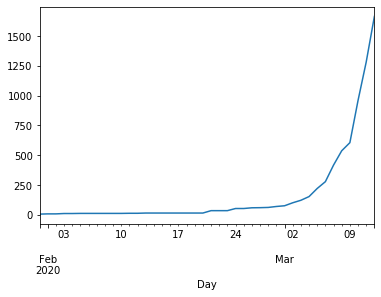

In [43]:
# Drop rows with NaN values
time_series = confirmed.dropna(axis='rows')
# Plot US confirmed cases
time_series['US'].plot();

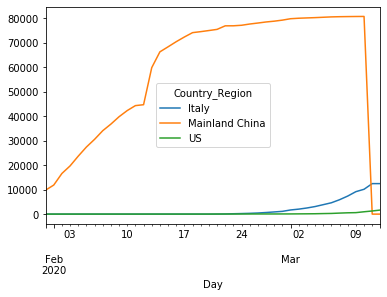

In [45]:
# Plot all three countries' confirmed cases
time_series.plot();

- Now datetime comes into its own ...

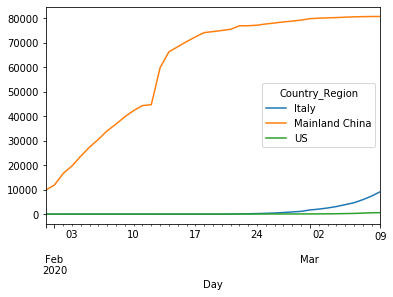

In [47]:
# Plot the timeseries up to March 9th
time_series[:'2020-03-09'].plot();

- This shows total cases. Let's look at new cases.
- `diff()` computes the difference between two time steps and allows us to understand rates of change.

In [56]:
new_cases = time_series.diff()
new_cases

Country_Region,Italy,Mainland China,US
Day,,,
2020-01-31,NaN,NaN,NaN
2020-02-01,0,2088,2
2020-02-02,0,4736,0
2020-02-03,0,3086,3
2020-02-04,0,3987,0
2020-02-05,0,3729,1
2020-02-06,0,3144,0
2020-02-07,1,3522,0
2020-02-08,0,2703,0


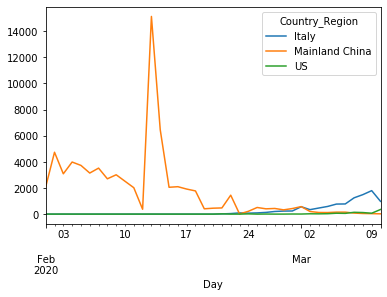

In [57]:
new_cases['2020-02-01':'2020-03-10'].plot();

- We can change the granularity of our step.
- Let's plot by week instead of day.
- `resample()` lets us change the step size and define how we combine values.
  - In this case, we look at the max new cases per week.

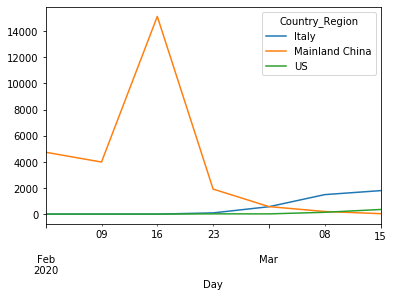

In [58]:
new_cases['2020-02-01':'2020-03-10'].resample("W").max().plot();

- We can use datetime to group data by days of the week

In [59]:
# Get a subset of the data and treat the dates as a normal column instead of an index
new_cases = new_cases['2020-02-01':'2020-03-10'].reset_index()
new_cases.head()

Country_Region,Day,Italy,Mainland China,US
0,2020-02-01,0,2088,2
1,2020-02-02,0,4736,0
2,2020-02-03,0,3086,3
3,2020-02-04,0,3987,0
4,2020-02-05,0,3729,1


In [60]:
# Combine the country columns
new_cases = new_cases.melt(id_vars='Day')
# Fix data types
new_cases['value'] = new_cases['value'].astype('Int64')
# Split, apply, combine:
# Group by day of the week then the country,
# finding averages of new cases for each category
week_days = new_cases.groupby([new_cases['Day'].dt.weekday, 'Country_Region'])['value'].mean()
week_days

Day  Country_Region
0    Italy              368.833333
     Mainland China    1328.333333
     US                  19.000000
1    Italy              256.000000
     Mainland China    1406.333333
     US                  62.666667
2    Italy              143.600000
     Mainland China    1006.600000
     US                   7.600000
3    Italy              194.200000
     Mainland China    3862.800000
     US                  14.200000
4    Italy              205.800000
     Mainland China    2186.400000
     US                  15.800000
5    Italy              254.833333
     Mainland China    1467.000000
     US                  24.833333
6    Italy              358.500000
     Mainland China    1747.500000
     US                  21.000000
Name: value, dtype: float64

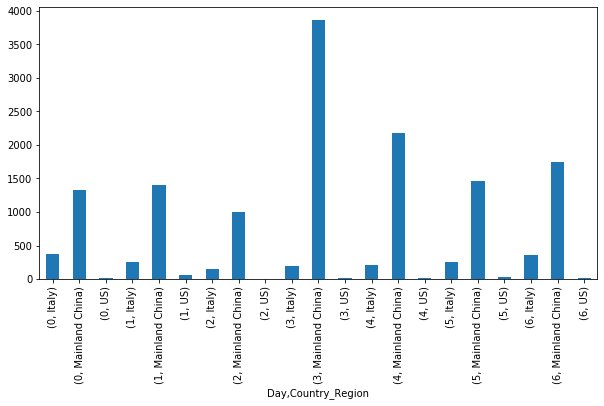

In [61]:
# Final plot of mean number of new cases by day and country
week_days.plot(kind='bar',figsize=(10, 5));

## Objectives
- Download and clean a real-world dataset
- Use the datetime datatype to resample a time series
- Plot different timeframes of a time series
- Use the datetime datatype to group data by days of the week